<a href="https://colab.research.google.com/github/JagritiPrakash/ML-Internship-Technocolab/blob/master/parkinsonspred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install xgboost


In [2]:
from xgboost import XGBClassifier

In [3]:
import pandas as pd

In [4]:
from google.colab import files

In [5]:
upload_files = files.upload()

Saving parkinsons.csv to parkinsons.csv


In [6]:
!ls

parkinsons.csv	sample_data


In [8]:
dataset = pd.read_csv('parkinsons.csv')

In [9]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [12]:
import pickle

(195, 24)
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...         PPE      status
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    0.206552    0.753846
std      41.390065     91.491548  ...    0.090119    0.431878
min      88.333000    102.145000  ...    0.044539    0.0

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

100.0
92.3076923076923
[[ 7  3]
 [ 0 29]]


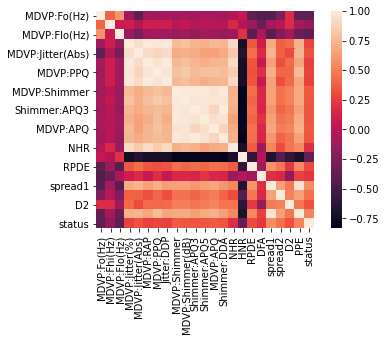

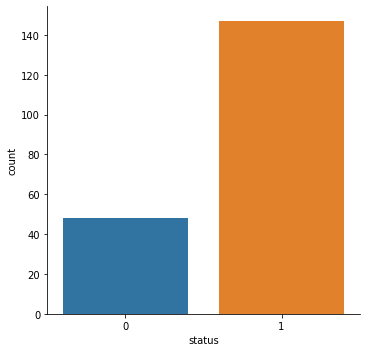

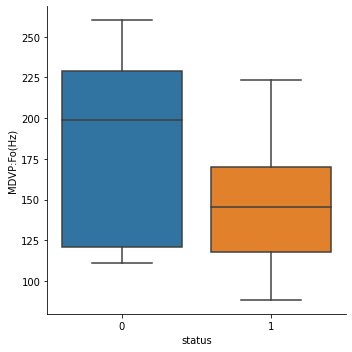

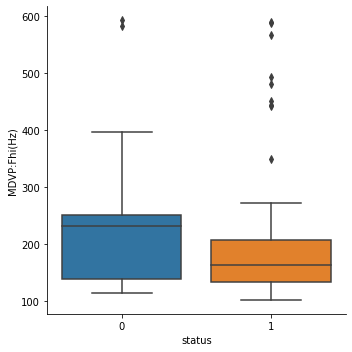

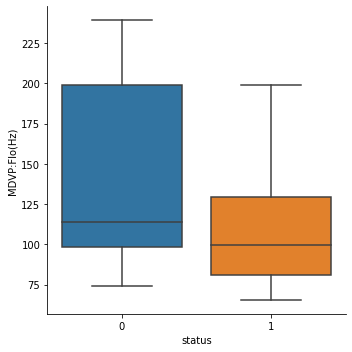

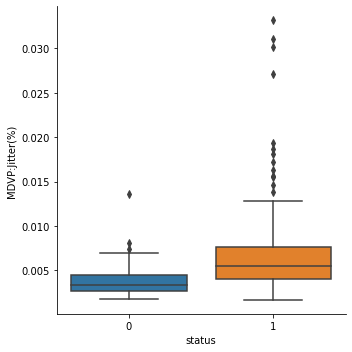

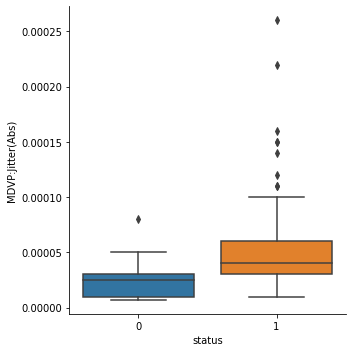

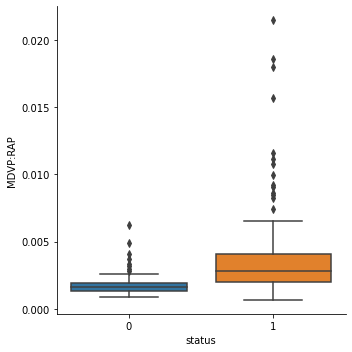

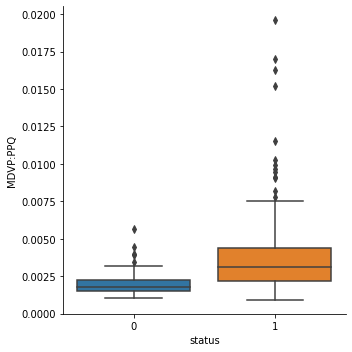

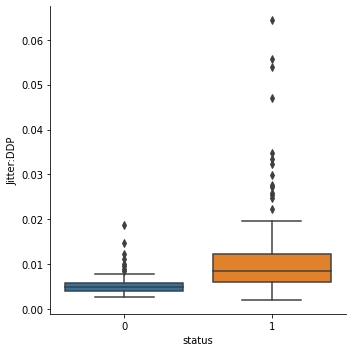

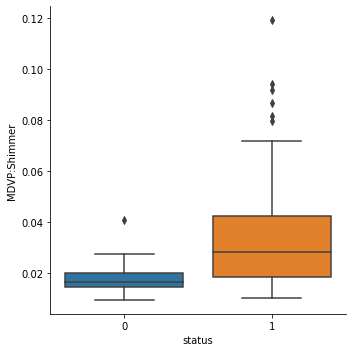

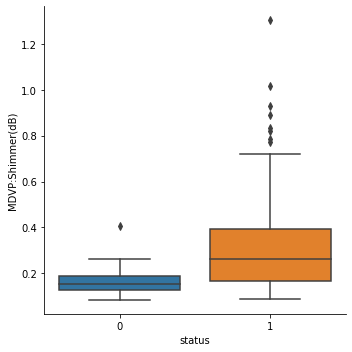

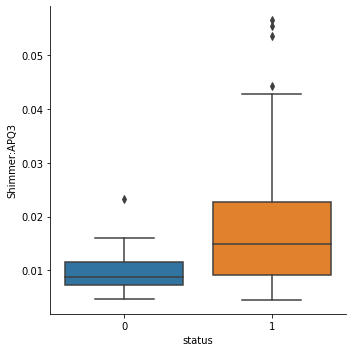

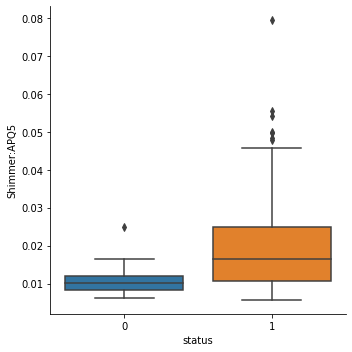

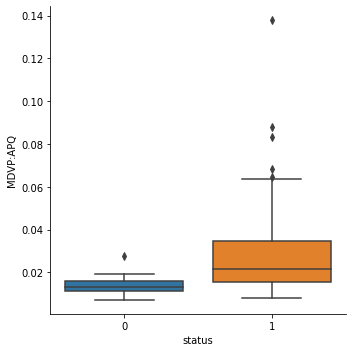

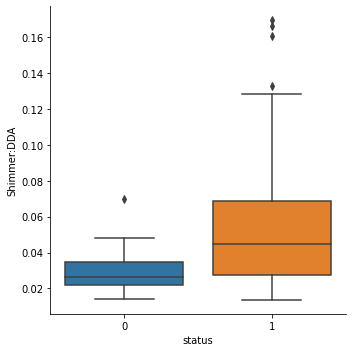

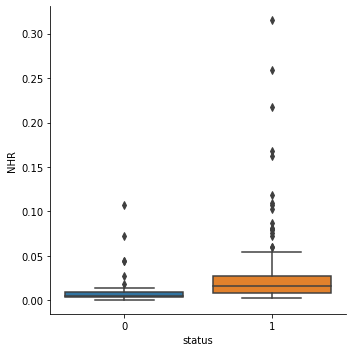

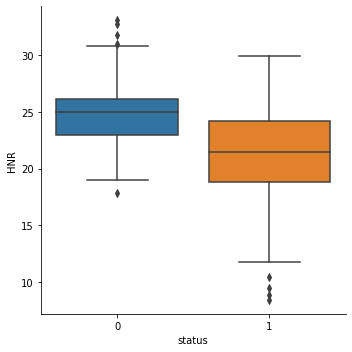

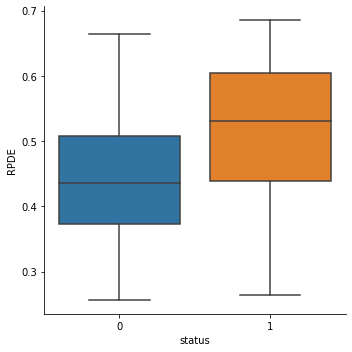

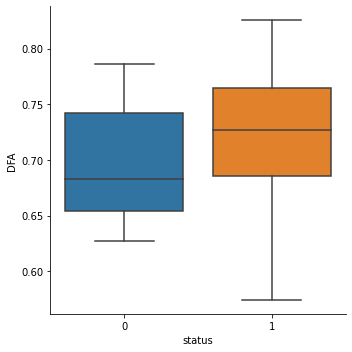

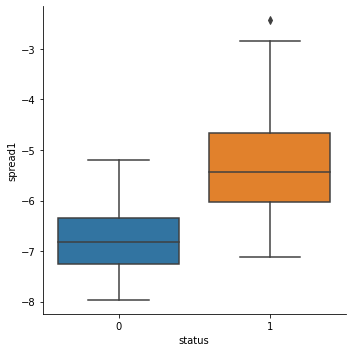

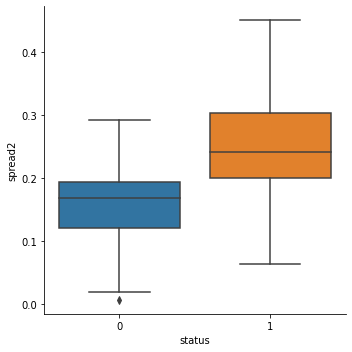

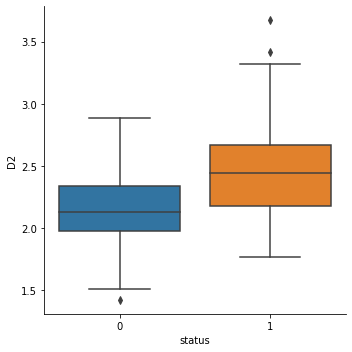

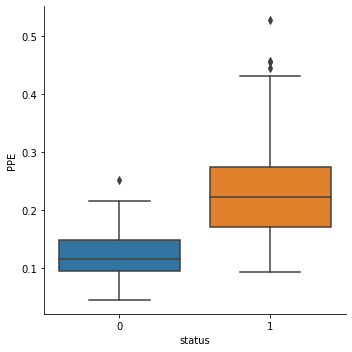

In [13]:


print(dataset.shape)
print(dataset.dtypes)
print(dataset.describe())

dataset.isnull().sum()

import seaborn as sns
corr_map = dataset.corr()
sns.heatmap(corr_map,square=True)

correlation_values=dataset.corr()['status']
correlation_values.abs().sort_values(ascending=False)

sns.catplot(x='status',kind='count',data=dataset)

for i in dataset:
    if i != 'status' and i != 'name':
        sns.catplot(x='status',y=i,kind='box',data=dataset)
        

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features=dataset.drop(['status','name'],axis=1)
labels=dataset['status']

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

modelx = XGBClassifier()
modelx.fit(x_train, y_train)
y_predtr=modelx.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

y_pred=modelx.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
        

pickle.dump(modelx, open('model.pkl' , "wb"))


